# [Blog home](http://rajeshrinet.github.io/blog)
$$
$$

##  Exclusion processes 

Exclusion processes refer to a family of models of transport where particles have hard-core interaction. A randomly chosen particle on a 1D lattice will move to its neighbouring site if it is empty. These models can be studied under different kind of boundary conditions. We will only be concerned with open chain exclusion process where particles are injected from the left boundary at a rate $\alpha_1$ and are absorbed at the right boundary at rate $\beta_1$.  

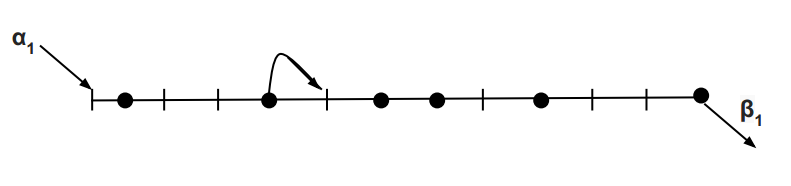

In [4]:
from IPython.core.display import Image 
Image(filename='plots/asep-schema.png') 

## Asymmetric simple exclusion processes (ASEPs)

If a randomly chosen particle can hop to right and left with same probability, then the process is called symmetric exclusion process. Usually, the rates of movement to left and right are different and hence the model is generally called ASEP.
We will be concerned mainly with what is called totally asymmetric simple exclusion processes (**TASEPs**) where the rate of movement to the left is zero while particles move to right with a rate 1, given that the next site is empty (*exclusion*). 

The exact solution for this model was given by Derrida et al. (1992) for  $\alpha_1=\beta_1=1$, which was soon extended by 
[Schutz and Domany (1993)](http://arxiv.org/pdf/cond-mat/9303038.pdf) for all $\alpha_1, \beta_1$.

###  Phase transitions in TASEP
Once a steady state is achieved in this non-equilibrium system, a steady state particle current $j$ can be defined. The current $j$
is related to the bulk density $\rho$, on account of hard-core repulsion, 
$$j = \rho(1-\rho)$$

Density on the lattice have interesting shapes in this model with extended bulk parts. Certain narrow regions where the density varies very rapidly, are called **boundary layers**. These boundary layers can appear in either or both of the boundaries. 

The system exhibits three distinct phases.

* **Low density phase:** If the particles are not injected too fast, $\alpha_1<1/2$, and they are absorbed at a rate higher than they are supplied, i.e.,  

$$\alpha_1< \beta_1;   \qquad \alpha_1<1/2, $$

the bulk density in the system is **low, $\rho = \alpha_1$**. In the low density phase the exponentially decaying boundary layers, having a finite size, are formed on the right boundaries.


* **High density phase:** If the particles are not absorbed too fast, $\beta_1 < 1/2 $, and they are injected at a higher rate,

$$\alpha_1 > \beta_1;   \qquad \beta_1<1/2$$

and the bulk density in the system is **high, $\rho = (1-\beta_1)$**. This implies that there is a discontinuous phase transition on account of the change in bulk density along the line $\alpha_1=\beta_1$ from $\alpha$ to $(1-\alpha)$. Boundary layers are formed on the left side of the chain in the high density phase and it also has a finite width. Thus we see that there is discontinuous change in the boundary layer as well, as we go from low density to the high density phase. These boundary layers also decay exponentially.

* **Maximal current phase:** In this case the particles are both supplied and absorbed, sufficiently fast,

$$\alpha_1, \beta_1>1/2$$

This is called the maximal current phase where the transport in the bulk is most appreciable. The steady state density is then, $\rho=1/2$ and hence the steady state current reaches its maximum value, $j=1/4$. In this case the boundary layers are formed on the both boundaries and the width of the boundary layer diverges and hence there is a power law form, indicating the continuous phase transition. 

### Hydrodynamic theory of TASEPs


The continuum limit of the stochastic equations of the motions can be obtained by invoking the conservation law,
$$
\frac{\partial \rho}{\partial t} = - \frac{\partial j}{\partial x} 
$$

But we know that bounary layers are formed and they will correspond to singular part of the differential function and has to be wriiten carefully. To take care of this, a second order term 
is introduced ([Popkov and Schutz 2002](http://arxiv.org/pdf/cond-mat/0211659.pdf)) with a vanishing co-efficient ($\epsilon\rightarrow 0$). This regularising term renders our equations to give sensible answers. 
$$
\frac{\partial \rho}{\partial t} = \epsilon \frac{\partial^2 j}{\partial x^2}  - \frac{\partial j}{\partial x} 
$$

where, $j= \rho(1-\rho)$, is particle current on account of hopping on the lattice.

In the following code we have solved the hydrodynamic equation using scikits.bvp_solver. We specify the boundary conditions on the two ends of the lattice and then solve the resulting boundary value problem. We inject particles from the left at a rate $\alpha_1$  while particles are absorbed from the other end on the lattice at a rate $\beta_1$. So the boundary condition on the left side is  $\alpha_1$ while the boundary condition on the right is $(1−\beta_1)$. We put all these ingredients in our solver and we see that the hydrodynamic theory predicts all the phase as seen in the corresponding 
[Monte Carlo simulaton](https://github.com/rajeshrinet/compPhy/tree/master/codes/c-cpp/asep/). We find an excellent agreement between these two approaches.

###  Low density phase

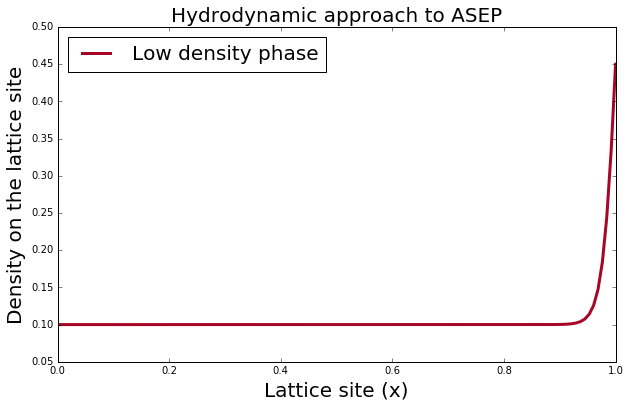

In [5]:
%matplotlib inline
import scikits.bvp_solver
import numpy as np
from matplotlib import pyplot as plt


def ASEP(a, b, N, b1, b2, epi, col):
    ''' solving the hydrodynamic approach to the ASEP problem'''
    def rhs(X, y):
        return np.array([ y[1],
                          epi*( y[1] - 2*y[0]*y[1]) 
                          ])


    def boundary_conditions(Ya, Yb):
        ''' This is to set the BC for the problem'''
        BCa = np.array([ Ya[0] - b1  ]) 
        
        BCb = np.array([ Yb[0] - b2  ]) 
        
        return BCa, BCb


    def guess_y (X):
        '''This is the guess to the answer one expects. A wise guess can help the integrator immensely!'''
        return np.array([ 
                              0.3*np.sin(X*np.pi/2), 
                              0.7*np.sin(X*np.pi/2)  ])

    problem_definition = scikits.bvp_solver.ProblemDefinition(num_ODE = 2,
                                                      num_parameters = 0,
                                                      num_left_boundary_conditions = 1,
                                                      boundary_points = (a, b),
                                                      function = rhs,
                                                      boundary_conditions = boundary_conditions)

    solution = scikits.bvp_solver.solve(bvp_problem = problem_definition,
                                solution_guess = guess_y)


    x = np.linspace(a, b, N)   # define the domain of solution 
    y = solution(x)            # solve the DE and store in y
    #Simulation completed!
    
    #Plotting business
    plt.plot(x, y[0,:],'-', color=col, linewidth=3, alpha=1, label='Low density phase')
    plt.legend(loc="upper left", fontsize=20)
    plt.xlabel("Lattice site (x)", fontsize=20)
    plt.ylabel("Density on the lattice site", fontsize=20)
    plt.title("Hydrodynamic approach to ASEP", fontsize=20)
    plt.show()
    ##########


## define parameters
a, b, N = 0.0, 1.0, 128                         # this defines the domain 
epi   = 100                                     # singularity parameters       
b1, b2  = 0.1, .45                              # BC on lattice 1
m1 = np.array([0.0])


f = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
col = np.array(["#A60628", "blue", "black", "red", "#348ABD", ])
ASEP(a, b, N, b1, b2, epi, col[0])

### High density phase

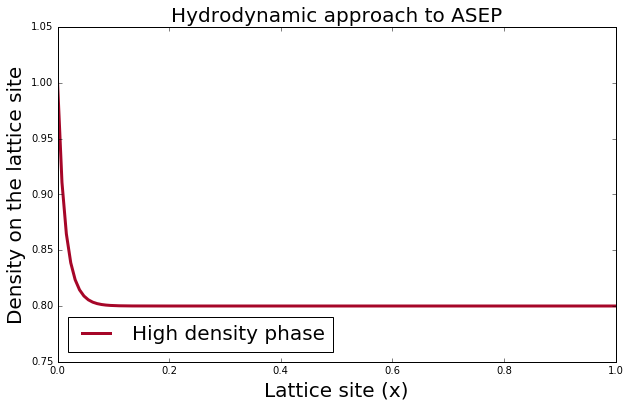

In [6]:
import scikits.bvp_solver
import numpy as np
from matplotlib import pyplot as plt


def ASEP(a, b, N, b1, b2, epi, col):
    ''' solving the hydrodynamic approach to the ASEP problem'''
    def rhs(X, y):
        return np.array([ y[1],
                          epi*( y[1] - 2*y[0]*y[1]) 
                          ])


    def boundary_conditions(Ya, Yb):
        ''' This is to set the BC for the problem'''
        BCa = np.array([ Ya[0] - b1  ]) 
        
        BCb = np.array([ Yb[0] - b2  ]) 
        
        return BCa, BCb


    def guess_y (X):
        '''This is the guess to the answer one expects. A wise guess can help the integrator immensely!'''
        return np.array([ 
                              -0.3*np.cos(2*X*np.pi), 
                              0.7*np.cos(X*np.pi)  ])

    problem_definition = scikits.bvp_solver.ProblemDefinition(num_ODE = 2,
                                                      num_parameters = 0,
                                                      num_left_boundary_conditions = 1,
                                                      boundary_points = (a, b),
                                                      function = rhs,
                                                      boundary_conditions = boundary_conditions)

    solution = scikits.bvp_solver.solve(bvp_problem = problem_definition,
                                solution_guess = guess_y)


    x = np.linspace(a, b, N)   # define the domain of solution 
    y = solution(x)            # solve the DE and store in y
    #Simulation completed!
    
    #Plotting business
    plt.plot(x, y[0,:],'-', color=col, linewidth=3, alpha=1, label='High density phase')
    plt.legend(loc="lower left", fontsize=20)
    plt.xlabel("Lattice site (x)", fontsize=20)
    plt.ylabel("Density on the lattice site", fontsize=20)
    plt.title("Hydrodynamic approach to ASEP", fontsize=20)
##########


## define parameters
a, b, N = 0.0, 1, 128                         # this defines the domain 
epi   = 100                                     # singularity parameters       
b1, b2  = 1, .8                              # BC on lattice 1
m1 = np.array([0.0])


f = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
col = np.array(["#A60628", "blue", "black", "red", "#348ABD", ])
ASEP(a, b, N, b1, b2, epi, col[0])

###  Maximal current phase

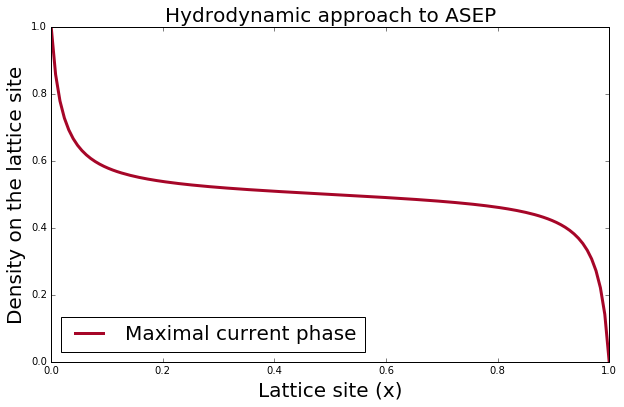

In [7]:
import scikits.bvp_solver
import numpy as np
from matplotlib import pyplot as plt


def ASEP(a, b, N, b1, b2, epi, col):
    ''' solving the hydrodynamic approach to the ASEP problem'''
    def rhs(X, y):
        return np.array([ y[1],
                          epi*( y[1] - 2*y[0]*y[1]) 
                          ])


    def boundary_conditions(Ya, Yb):
        ''' This is to set the BC for the problem'''
        BCa = np.array([ Ya[0] - b1  ]) 
        
        BCb = np.array([ Yb[0] - b2  ]) 
        
        return BCa, BCb


    def guess_y (X):
        '''This is the guess to the answer one expects. A wise guess can help the integrator immensely!'''
        return np.array([ 
                              -0.3*np.cos(2*X*np.pi), 
                              0.7*np.cos(X*np.pi)  ])

    problem_definition = scikits.bvp_solver.ProblemDefinition(num_ODE = 2,
                                                      num_parameters = 0,
                                                      num_left_boundary_conditions = 1,
                                                      boundary_points = (a, b),
                                                      function = rhs,
                                                      boundary_conditions = boundary_conditions)

    solution = scikits.bvp_solver.solve(bvp_problem = problem_definition,
                                solution_guess = guess_y)


    x = np.linspace(a, b, N)   # define the domain of solution 
    y = solution(x)            # solve the DE and store in y
    #Simulation completed!
    
    #Plotting business
    plt.plot(x, y[0,:],'-', color=col, linewidth=3, alpha=1, label='Maximal current phase')
    plt.legend(loc="lower left", fontsize=20)
    plt.xlabel("Lattice site (x)", fontsize=20)
    plt.ylabel("Density on the lattice site", fontsize=20)
    plt.title("Hydrodynamic approach to ASEP", fontsize=20)
##########


## define parameters
a, b, N = 0.0, 1.0, 128                         # this defines the domain 
epi   = 100                                     # singularity parameters       
b1, b2  = 1, 0                              # BC on lattice 1
m1 = np.array([0.0])


f = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
col = np.array(["#A60628", "blue", "black", "red", "#348ABD", ])
ASEP(a, b, N, b1, b2, epi, col[0])

###  Phase transitions in the single lane TASEP
It should be noted that boundary layer is formed on **right boundary** for the low density phase while they are formed on the **left boundary** for a high density phase. Also in the low density phase the bulk density equals the left boundary condition $\alpha_1$ while the bulk density in the high density phase is $\beta_1$. So there is a discontinuous jump in the density from $\alpha$ to $1-\alpha_1$ along the $\alpha=\beta$ line for $\alpha,~\beta<1$.


Boundary layers in the low and high density phases decay exponentianlly. Thus there is a finite localization length $\xi$ in these two phases. $\xi$ diverges as the maximal current phase is reached where the bulk density is $0.5$. Here we see a power law decay of the layer and hence $\xi\rightarrow\infty$. More details can be found in the work of [Schutz and Domany 1993](http://arxiv.org/pdf/cond-mat/9303038.pdf).


## Two-lane problems

The same model can be studied with two parallel lanes. Here, we will not consider the case without particle exchange between the lanes. These lanes affect the dynamics indirectly by tuning the transition rate on the respective lattices. This phenomenon is very nicely captured by the hydrodynamic description of the model. Thje densities on the two lanes are denoted by $\rho$ and $\sigma$ respectively. Also on account og the interaction between the lattice the current in the respective lattice in modified as  $j_{\rho}= \rho(1-\rho) (1- (1-\beta)\sigma)$. 
Below is a schematic diagram of the same.

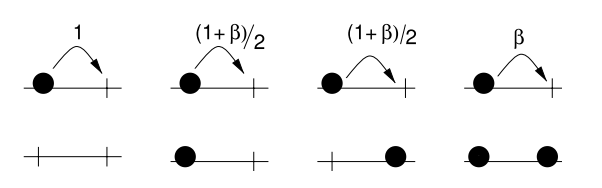

In [8]:
from IPython.core.display import Image 
Image(filename='plots/asep-schema-2lane.png') 

Lets define, $m=1-\beta$ to save some ink So $m=0$ is no interaction while $m=1$ is the maximum interaction. The hydrodynamic equation for lanes are

$$
\frac{\partial \rho}{\partial t} = - \frac{\partial j_{\rho}}{\partial x}  + \epsilon \frac{\partial^2 \rho}{\partial x^2}   
$$

$$
\frac{\partial \sigma}{\partial t} = - \frac{\partial j_{\sigma}}{\partial x}  + \epsilon \frac{\partial^2 \sigma}{\partial x^2}  
$$

More details of the model can be found in our previous [work](http://arxiv.org/pdf/1208.4916.pdf). The resulting coupled second order boundary value problem has been solved in the following codes. It has been system that the system exhibits a "traffice jam" kind of situation. 

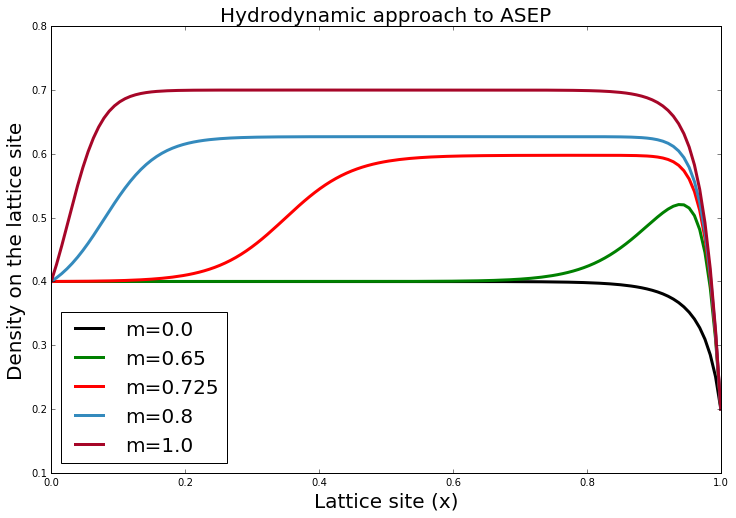

In [9]:
# Solution of y1'' = f(x) and y2''(x)=g(x) over the domain (a, b)
# We have the boundary condition y1(a), y1(b), y2(a), y2(b)
#
#
# Rajesh Singh
# 20130726
#
import scikits.bvp_solver
import numpy as np
from matplotlib import pyplot as plt


def ASEP(a, b, N, b1, b2, b3, b4, epi, m, i, col):
    ''' solving the hydrodynamic approach to the ASEP problem'''
    def rhs(X, y):
        return np.array([
                         y[1],                                                               # y1'  

                         epi*( (y[1] - 2*y[0]*y[1]) * (1-m* y[2])- y[0]*(1-y[0])*m*y[3]),     # y1'' = f(x)
                         
                         y[3],                                                               # y2'
                         
                         epi*(	(y[3] - 2*y[2]*y[3]) * (1-m* y[0])- y[2]*(1-y[2])*m*y[1])    # y2'' = g(x)
                         ]) 


    def boundary_conditions(Ya, Yb):
        ''' This is to set the BC for the problem'''
        BCa = np.array([ Ya[0] - b1, Ya[2] - b3  ]) 
        
        BCb = np.array([ Yb[0] - b2, Yb[2] - b4  ]) 
        
        return BCa, BCb


    def guess_y (X):
        '''This is the guess to the answer one expects. A wise guess can help the integrator immensely!'''
        return np.array([ 
                              0.3*np.cos(X*np.pi), 
                              0.7*np.cos(X*np.pi)  , 
                              0.01*np.cos(X*np.pi), 
                              0.01*np.cos(X*np.pi)  , 
                              ])

    problem_definition = scikits.bvp_solver.ProblemDefinition(num_ODE = 4,
                                                      num_parameters = 0,
                                                      num_left_boundary_conditions = 2,
                                                      boundary_points = (a, b),
                                                      function = rhs,
                                                      boundary_conditions = boundary_conditions)

    solution = scikits.bvp_solver.solve(bvp_problem = problem_definition,
                                solution_guess = guess_y)


    x = np.linspace(a, b, N)   # define the domain of solution 
    y = solution(x)            # solve the DE and store in y
    #Simulation completed!
    
    #Plotting business
    plt.plot(x, y[0,:],'-', color=col, linewidth=3, alpha=1, label='m=%s'%(m))
    plt.legend(loc="lower left", fontsize=20)
    plt.xlabel("Lattice site (x)", fontsize=20)
    plt.ylabel("Density on the lattice site", fontsize=20)
    plt.title("Hydrodynamic approach to ASEP", fontsize=20)
##########


## define parameters
a, b, N = 0.0, 1.0, 128                         # this defines the domain 
epi   = 100                                     # singularity parameters       
b1, b2  = 0.4, 0.2                              # BC on lattice 1
b3, b4  = 0.01, 0.8                             # BC on lattice 2
m1 = np.array([0.0, 0.65,  0.725, 0.8, 1])


f = plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
col = np.array(["black", "green", "red", "#348ABD", "#A60628"])
i = 0
for i in range(5):
    ASEP(a, b, N, b1, b2, b3, b4, epi, m1[i], i, col[i])

plt.show()

##  Phase plane analysis

The equations of the two lanes resist exact solution and hence we have analysed them on the phase plane and again we see the "traffic jam" here as well. In the steady state, the equations reduces to 

$$
 - \frac{\partial j_{\rho}}{\partial x}  + \epsilon \frac{\partial^2 \rho}{\partial x^2}   
=0
$$

$$
 - \frac{\partial j_{\sigma}}{\partial x}  + \epsilon \frac{\partial^2 \sigma}{\partial x^2}  
=0
$$

These equation gives constant bulk solutions. We need to do more work to understand the boundary layers. Integrating the equation once, we get,

$$
 \frac{\partial \rho}{\partial \tilde{x}}  =  \rho(1-\rho) (1-m\sigma) + c_1
 $$

$$
  \frac{\partial \sigma}{\partial \tilde{x}} = \sigma(1-\sigma) (1-m\rho) +  c_2
$$

The above equation is then analysed for stability. In general one will get five solutions for $\rho^*$ or $\sigma^*$ of which only real and positive densities are physically relevant. Then we could do a stability analysis about the fixed point and argue about the existence of the boundary layer(s). The method has been discussed in detail in our previous [work](http://arxiv.org/pdf/1208.4916.pdf).